In [1]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from keras.models import Sequential

In [2]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Perform Reshaping on x_train,x_test

x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test= x_test.reshape(x_test.shape[0],28,28,1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
#Normalizing the Data by Min Max (0-1)

x_train= x_train/255
x_test= x_test/255

In [7]:
y_train[0]

5

In [8]:
#One Hot Encoding 

y_train= keras.utils.to_categorical(y_train,10)
y_test= keras.utils.to_categorical(y_test,10)

In [9]:

model= Sequential()

model.add(Conv2D(6,kernel_size=(5,5), activation='tanh', padding= 'valid', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size= (2,2), strides=2, padding='valid'))
model.add(Conv2D(16,kernel_size=(5,5), activation='tanh', padding= 'valid'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='Softmax'))



model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [10]:
model.compile(loss= keras.metrics.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

In [11]:
model_history= model.fit(x_train, y_train, batch_size= 128, epochs= 10, verbose= 1, validation_data= (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 6ms/step - loss: 0.3478 - accuracy: 0.9024 - val_loss: 0.1844 - val_accuracy: 0.9402
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1346 - accuracy: 0.9589 - val_loss: 0.1039 - val_accuracy: 0.9696
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0912 - accuracy: 0.9721 - val_loss: 0.0757 - val_accuracy: 0.9766
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0657 - val_accuracy: 0.9794
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0560 - accuracy: 0.9823 - val_loss: 0.0606 - val_accuracy: 0.9803
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0539 - val_accuracy: 0.9835
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0479 - val_accuracy: 0.9833
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


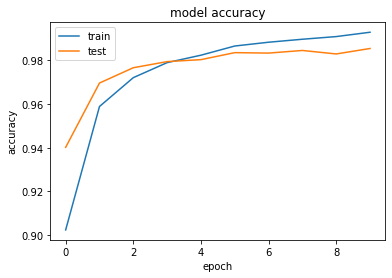

In [12]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

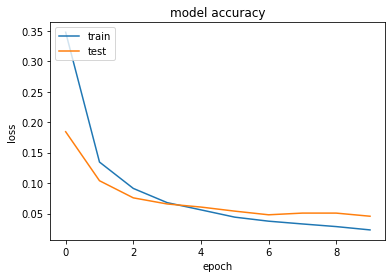

In [13]:

# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
score= model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0455 - accuracy: 0.9854


In [15]:
print('Test loss:',score[0])
print('Accuracy:',score[1])

Test loss: 0.04554527625441551
Accuracy: 0.9854000210762024


In [16]:
prediction= model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
predict_img= np.argmax(prediction[7])
predict_img

9